In [110]:
%matplotlib notebook

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates
import scipy.stats as st
from scipy.stats import linregress

In [112]:
homicides_df = "Chicago Homicides.csv"

homicides_df = pd.read_csv(homicides_df, encoding="utf=8")

homicides_df

,ID,Date,Primary Type,Description,Arrest,Domestic,Year,Latitude,Longitude
0,23059,Jan-17,HOMICIDE,FIRST DEGREE MURDER,True,False,2017,41.966082,-87.657908
1,23060,Jan-17,HOMICIDE,FIRST DEGREE MURDER,False,False,2017,41.879291,-87.741599
2,23106,Jan-17,HOMICIDE,FIRST DEGREE MURDER,True,False,2017,41.926841,-87.735416
3,23061,Jan-17,HOMICIDE,FIRST DEGREE MURDER,False,False,2017,41.886341,-87.712000
4,23062,Jan-17,HOMICIDE,FIRST DEGREE MURDER,False,False,2017,41.871868,-87.706610
...,...,...,...,...,...,...,...,...,...
3385,26536,Dec-21,HOMICIDE,FIRST DEGREE MURDER,False,False,2021,41.871057,-87.696811
3386,26537,Dec-21,HOMICIDE,FIRST DEGREE MURDER,True,False,2021,41.936063,-87.722727
3387,26538,Dec-21,HOMICIDE,FIRST DEGREE MURDER,False,False,2021,41.880751,-87.723856
3388,26539,Dec-21,HOMICIDE,FIRST DEGREE MURDER,False,False,2021,41.841646,-87.708615


In [113]:
homicides_df = homicides_df.set_index(["ID"])
homicides_df

,Date,Primary Type,Description,Arrest,Domestic,Year,Latitude,Longitude
ID,,,,,,,,
23059,Jan-17,HOMICIDE,FIRST DEGREE MURDER,True,False,2017,41.966082,-87.657908
23060,Jan-17,HOMICIDE,FIRST DEGREE MURDER,False,False,2017,41.879291,-87.741599
23106,Jan-17,HOMICIDE,FIRST DEGREE MURDER,True,False,2017,41.926841,-87.735416
23061,Jan-17,HOMICIDE,FIRST DEGREE MURDER,False,False,2017,41.886341,-87.712000
23062,Jan-17,HOMICIDE,FIRST DEGREE MURDER,False,False,2017,41.871868,-87.706610
...,...,...,...,...,...,...,...,...
26536,Dec-21,HOMICIDE,FIRST DEGREE MURDER,False,False,2021,41.871057,-87.696811
26537,Dec-21,HOMICIDE,FIRST DEGREE MURDER,True,False,2021,41.936063,-87.722727
26538,Dec-21,HOMICIDE,FIRST DEGREE MURDER,False,False,2021,41.880751,-87.723856


In [114]:
homicides_df = homicides_df.dropna(how='any')

In [115]:
homicides_df.count()

Date            3390
Primary Type    3390
Description     3390
Arrest          3390
Domestic        3390
Year            3390
Latitude        3390
Longitude       3390
dtype: int64

In [116]:
homicides_2017 = homicides_df[homicides_df["Year"] == 2017]
homicides_2017

,Date,Primary Type,Description,Arrest,Domestic,Year,Latitude,Longitude
ID,,,,,,,,
23059,Jan-17,HOMICIDE,FIRST DEGREE MURDER,True,False,2017,41.966082,-87.657908
23060,Jan-17,HOMICIDE,FIRST DEGREE MURDER,False,False,2017,41.879291,-87.741599
23106,Jan-17,HOMICIDE,FIRST DEGREE MURDER,True,False,2017,41.926841,-87.735416
23061,Jan-17,HOMICIDE,FIRST DEGREE MURDER,False,False,2017,41.886341,-87.712000
23062,Jan-17,HOMICIDE,FIRST DEGREE MURDER,False,False,2017,41.871868,-87.706610
...,...,...,...,...,...,...,...,...
23750,Dec-17,HOMICIDE,FIRST DEGREE MURDER,False,False,2017,41.784092,-87.683772
23751,Dec-17,HOMICIDE,FIRST DEGREE MURDER,False,False,2017,41.746538,-87.622881
23754,Dec-17,HOMICIDE,FIRST DEGREE MURDER,False,False,2017,41.889006,-87.723462


In [117]:
homicides_month_2017 = homicides_2017.groupby(["Date"])["Primary Type"].count()
homicides_month_2017

Date
Apr-17    49
Aug-17    59
Dec-17    39
Feb-17    50
Jan-17    55
Jul-17    76
Jun-17    87
Mar-17    42
May-17    57
Nov-17    41
Oct-17    60
Sep-17    61
Name: Primary Type, dtype: int64

In [118]:
homicides_month_2017 = pd.DataFrame(homicides_month_2017)

In [119]:
homicides_month_2017

,Primary Type
Date,
Apr-17,49
Aug-17,59
Dec-17,39
Feb-17,50
Jan-17,55
Jul-17,76
Jun-17,87
Mar-17,42
May-17,57


In [120]:
homicides_2018 = homicides_df[homicides_df["Year"] == 2018]
homicides_2018

,Date,Primary Type,Description,Arrest,Domestic,Year,Latitude,Longitude
ID,,,,,,,,
23757,Jan-18,HOMICIDE,FIRST DEGREE MURDER,False,False,2018,41.944561,-87.726682
23758,Jan-18,HOMICIDE,FIRST DEGREE MURDER,False,False,2018,41.929727,-87.640921
23759,Jan-18,HOMICIDE,FIRST DEGREE MURDER,False,False,2018,41.808168,-87.633336
23761,Jan-18,HOMICIDE,FIRST DEGREE MURDER,True,False,2018,41.746984,-87.585429
24584,Jan-18,HOMICIDE,FIRST DEGREE MURDER,True,True,2018,41.770734,-87.606968
...,...,...,...,...,...,...,...,...
24363,Dec-18,HOMICIDE,FIRST DEGREE MURDER,True,False,2018,41.847238,-87.701441
24364,Dec-18,HOMICIDE,FIRST DEGREE MURDER,True,False,2018,41.775264,-87.765095
24365,Dec-18,HOMICIDE,FIRST DEGREE MURDER,True,False,2018,41.773350,-87.661613


In [121]:
homicides_month_2018 = homicides_2018.groupby(["Date"])["Primary Type"].count()
homicides_month_2018

Date
Apr-18    43
Aug-18    59
Dec-18    44
Feb-18    43
Jan-18    43
Jul-18    63
Jun-18    57
Mar-18    34
May-18    54
Nov-18    47
Oct-18    59
Sep-18    55
Name: Primary Type, dtype: int64

In [122]:
homicides_month_2018 = pd.DataFrame(homicides_month_2018)
homicides_month_2018

,Primary Type
Date,
Apr-18,43
Aug-18,59
Dec-18,44
Feb-18,43
Jan-18,43
Jul-18,63
Jun-18,57
Mar-18,34
May-18,54


In [123]:
homicides_2019 = homicides_df[homicides_df["Year"] == 2019]
homicides_2019

,Date,Primary Type,Description,Arrest,Domestic,Year,Latitude,Longitude
ID,,,,,,,,
24368,Jan-19,HOMICIDE,FIRST DEGREE MURDER,False,False,2019,41.802909,-87.621048
24369,Jan-19,HOMICIDE,FIRST DEGREE MURDER,False,False,2019,41.802909,-87.621048
24370,Jan-19,HOMICIDE,FIRST DEGREE MURDER,True,False,2019,41.904789,-87.661560
24371,Jan-19,HOMICIDE,FIRST DEGREE MURDER,True,False,2019,41.764065,-87.659515
24372,Jan-19,HOMICIDE,FIRST DEGREE MURDER,True,False,2019,41.777831,-87.773112
...,...,...,...,...,...,...,...,...
24884,Dec-19,HOMICIDE,FIRST DEGREE MURDER,False,False,2019,41.800053,-87.691533
24885,Dec-19,HOMICIDE,FIRST DEGREE MURDER,False,False,2019,41.854098,-87.669285
24886,Dec-19,HOMICIDE,FIRST DEGREE MURDER,False,False,2019,41.821762,-87.700712


In [124]:
homicides_month_2019 = homicides_2019.groupby(["Date"])["Primary Type"].count()
homicides_month_2019

Date
Apr-19    61
Aug-19    51
Dec-19    34
Feb-19    25
Jan-19    23
Jul-19    44
Jun-19    52
Mar-19    37
May-19    55
Nov-19    34
Oct-19    41
Sep-19    51
Name: Primary Type, dtype: int64

In [125]:
homicides_month_2019 = pd.DataFrame(homicides_month_2019)
homicides_month_2019

,Primary Type
Date,
Apr-19,61
Aug-19,51
Dec-19,34
Feb-19,25
Jan-19,23
Jul-19,44
Jun-19,52
Mar-19,37
May-19,55


In [126]:
homicides_2020 = homicides_df[homicides_df["Year"] == 2020]
homicides_2020

,Date,Primary Type,Description,Arrest,Domestic,Year,Latitude,Longitude
ID,,,,,,,,
24889,Jan-20,HOMICIDE,FIRST DEGREE MURDER,True,False,2020,41.764728,-87.561272
24890,Jan-20,HOMICIDE,FIRST DEGREE MURDER,True,False,2020,41.764728,-87.561272
24891,Jan-20,HOMICIDE,FIRST DEGREE MURDER,True,False,2020,41.768261,-87.621765
24892,Jan-20,HOMICIDE,FIRST DEGREE MURDER,True,False,2020,41.745259,-87.602587
25384,Jan-20,HOMICIDE,FIRST DEGREE MURDER,True,True,2020,41.914174,-87.710198
...,...,...,...,...,...,...,...,...
25692,Dec-20,HOMICIDE,FIRST DEGREE MURDER,True,False,2020,41.742292,-87.641172
25695,Dec-20,HOMICIDE,FIRST DEGREE MURDER,False,False,2020,41.894861,-87.764304
25698,Dec-20,HOMICIDE,FIRST DEGREE MURDER,False,False,2020,41.831017,-87.676627


In [127]:
homicides_month_2020 = homicides_2020.groupby(["Date"])["Primary Type"].count()
homicides_month_2020

Date
Apr-20     62
Aug-20     68
Dec-20     57
Feb-20     38
Jan-20     36
Jul-20    111
Jun-20     94
Mar-20     30
May-20     86
Nov-20     63
Oct-20     68
Sep-20     83
Name: Primary Type, dtype: int64

In [128]:
homicides_month_2020 = pd.DataFrame(homicides_month_2020)
homicides_month_2020

,Primary Type
Date,
Apr-20,62
Aug-20,68
Dec-20,57
Feb-20,38
Jan-20,36
Jul-20,111
Jun-20,94
Mar-20,30
May-20,86


In [129]:
homicides_2021 = homicides_df[homicides_df["Year"] == 2021]
homicides_2021

,Date,Primary Type,Description,Arrest,Domestic,Year,Latitude,Longitude
ID,,,,,,,,
25699,Jan-21,HOMICIDE,FIRST DEGREE MURDER,False,False,2021,41.808891,-87.616577
25700,Jan-21,HOMICIDE,FIRST DEGREE MURDER,False,False,2021,41.885721,-87.747018
25701,Jan-21,HOMICIDE,FIRST DEGREE MURDER,False,False,2021,41.858214,-87.704772
25702,Jan-21,HOMICIDE,FIRST DEGREE MURDER,False,False,2021,41.771062,-87.586271
25703,Jan-21,HOMICIDE,FIRST DEGREE MURDER,True,False,2021,41.736660,-87.544454
...,...,...,...,...,...,...,...,...
26536,Dec-21,HOMICIDE,FIRST DEGREE MURDER,False,False,2021,41.871057,-87.696811
26537,Dec-21,HOMICIDE,FIRST DEGREE MURDER,True,False,2021,41.936063,-87.722727
26538,Dec-21,HOMICIDE,FIRST DEGREE MURDER,False,False,2021,41.880751,-87.723856


In [130]:
homicides_month_2021 = homicides_2021.groupby(["Date"])["Primary Type"].count()
homicides_month_2021

Date
Apr-21     55
Aug-21     83
Dec-21     54
Feb-21     38
Jan-21     55
Jul-21    112
Jun-21     84
Mar-21     45
May-21     66
Nov-21     62
Oct-21     63
Sep-21     92
Name: Primary Type, dtype: int64

In [134]:
homicides_month_2021 = pd.DataFrame(homicides_month_2021)
homicides_month_2021

,Primary Type
Date,
Apr-21,55
Aug-21,83
Dec-21,54
Feb-21,38
Jan-21,55
Jul-21,112
Jun-21,84
Mar-21,45
May-21,66


In [150]:
crime_temp_2017 = pd.DataFrame({
    "Year": [2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "Temperature": [28.8, 38, 39.5, 53.7, 57.9, 72.4, 74.6, 71.5, 69.4, 57.6, 39.7, 27.2],
    "Homicide Total": [55, 50, 42, 49, 57, 87, 76, 59, 61, 60, 41, 39]
})

In [151]:
crime_temp_2017 = crime_temp_2017.set_index(["Year"])
crime_temp_2017

,Month,Temperature,Homicide Total
Year,,,
2017,Jan,28.8,55
2017,Feb,38.0,50
2017,Mar,39.5,42
2017,Apr,53.7,49
2017,May,57.9,57
2017,Jun,72.4,87
2017,Jul,74.6,76
2017,Aug,71.5,59
2017,Sep,69.4,61


In [152]:
crime_temp_2018 = pd.DataFrame({
    "Year": [2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "Temperature": [24.6, 28.8, 36.9, 41.2, 66.1, 71.5, 76.2, 76.3, 68.9, 52.7, 34.6, 33.2],
    "Homicide Total": [43, 43, 34, 43, 54, 57, 63, 59, 55, 59, 47, 44]
})

In [153]:
crime_temp_2018 = crime_temp_2018.set_index(["Year"])
crime_temp_2018

,Month,Temperature,Homicide Total
Year,,,
2018,Jan,24.6,43
2018,Feb,28.8,43
2018,Mar,36.9,34
2018,Apr,41.2,43
2018,May,66.1,54
2018,Jun,71.5,57
2018,Jul,76.2,63
2018,Aug,76.3,59
2018,Sep,68.9,55


In [154]:
crime_temp_2019 = pd.DataFrame({
    "Year": [2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "Temperature": [21, 25.9, 34.3, 49.7, 58, 67.8, 77.1, 72.9, 69.4, 50.9, 34.8, 34],
    "Homicide Total": [23, 25, 37, 61, 55, 52, 44, 51, 51, 41, 34, 34]
})

In [155]:
crime_temp_2019 = crime_temp_2019.set_index(["Year"])
crime_temp_2019

,Month,Temperature,Homicide Total
Year,,,
2019,Jan,21.0,23
2019,Feb,25.9,25
2019,Mar,34.3,37
2019,Apr,49.7,61
2019,May,58.0,55
2019,Jun,67.8,52
2019,Jul,77.1,44
2019,Aug,72.9,51
2019,Sep,69.4,51


In [157]:
crime_temp_2020 = pd.DataFrame({
    "Year": [2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "Temperature": [30.1, 30.2, 42.8, 48.4, 59.9, 74, 79.2, 76.8, 66.3, 51.5, 47.4, 32.8],
    "Homicide Total": [36, 38, 30, 62, 86, 94, 111, 68, 83, 68, 63, 57]
})

In [158]:
crime_temp_2020 = crime_temp_2020.set_index(["Year"])
crime_temp_2020

,Month,Temperature,Homicide Total
Year,,,
2020,Jan,30.1,36
2020,Feb,30.2,38
2020,Mar,42.8,30
2020,Apr,48.4,62
2020,May,59.9,86
2020,Jun,74.0,94
2020,Jul,79.2,111
2020,Aug,76.8,68
2020,Sep,66.3,83


In [162]:
crime_temp_2021 = pd.DataFrame({
    "Year": [2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "Temperature": [29.2, 20.2, 44.2, 51.9, 60.2, 74.3, 74.4, 77.1, 70.3, 59.7, 40.3, 38],
    "Homicide Total": [55, 38, 45, 55, 66, 84, 112, 83, 92, 63, 62, 54]
})

In [163]:
crime_temp_2021 = crime_temp_2021.set_index(["Year"])
crime_temp_2021

,Month,Temperature,Homicide Total
Year,,,
2021,Jan,29.2,55
2021,Feb,20.2,38
2021,Mar,44.2,45
2021,Apr,51.9,55
2021,May,60.2,66
2021,Jun,74.3,84
2021,Jul,74.4,112
2021,Aug,77.1,83
2021,Sep,70.3,92


<IPython.core.display.Javascript object>


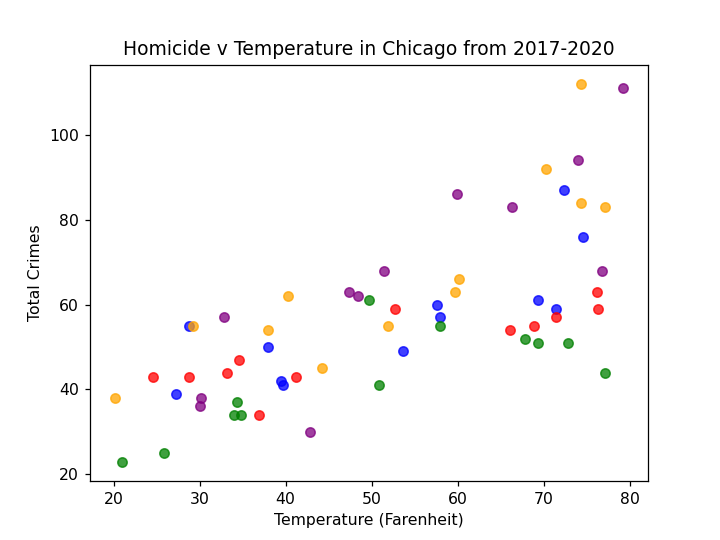

In [181]:
temp_2017 = crime_temp_2017["Temperature"]
temp_2018 = crime_temp_2018["Temperature"]
temp_2019 = crime_temp_2019["Temperature"]
temp_2020 = crime_temp_2020["Temperature"]
temp_2021 = crime_temp_2021["Temperature"]

homicide_2017 = crime_temp_2017["Homicide Total"]
homicide_2018 = crime_temp_2018["Homicide Total"]
homicide_2019 = crime_temp_2019["Homicide Total"]
homicide_2020 = crime_temp_2020["Homicide Total"]
homicide_2021 = crime_temp_2021["Homicide Total"]

plt.scatter(temp_2017, homicide_2017, marker="o", facecolors="b", alpha=.75)
plt.scatter(temp_2018, homicide_2018, marker="o", facecolors="r", alpha=.75)
plt.scatter(temp_2019, homicide_2019, marker="o", facecolors="g", alpha=.75)
plt.scatter(temp_2020, homicide_2020, marker="o", facecolors="purple", alpha=.75)
plt.scatter(temp_2021, homicide_2021, marker="o", facecolors="orange", alpha=.75)

plt.title("Homicide v Temperature in Chicago from 2017-2020")
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("Total Crimes")

plt.savefig("Homicide v Temperature in Chicago from 2017-2020")

In [176]:
correlation = st.pearsonr(temp_2017,homicide_2017)
correlation

(0.7863853795943088, 0.0024165000207227853)

In [177]:
correlation = st.pearsonr(temp_2018,homicide_2018)
correlation

(0.8542391240364064, 0.0004035749954785659)

In [178]:
correlation = st.pearsonr(temp_2019,homicide_2019)
correlation

(0.7747301079497914, 0.003085688732797196)

In [179]:
correlation = st.pearsonr(temp_2020,homicide_2020)
correlation

(0.8469205996996378, 0.0005089660952039789)

In [180]:
correlation = st.pearsonr(temp_2021,homicide_2021)
correlation

(0.8510267331061109, 0.0004475059100155917)